     Dataset Description
A person makes a doctor appointment, receives all the instructions and no-show. Who to blame? This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.



    Columns Description
1. PatientId: Identification of a patient.
2. AppointmentID: Identification of each appointment.
3. Gender: Male or Female.
4. AppointmentDay: The day of the actuall appointment, when they have to visit the doctor.
5. ScheduledDay: The day someone called or registered the appointment, this is before appointment of course.
6. Age: How old is the patient.
7. Neighbourhood: Where the appointment takes place.
8. Scholarship: True of False, indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.
9. Hipertension: True or False.
10. Diabetes: True or False.
11. Alcoholism: True or False.
12. Handcap: True or False.
13. SMS_received: 1 or more messages sent to the patient.
14. No-show: True (if the patient did not show up), or False (if the patient did show up).


Environment set-up

In [2]:
 #importing lib.
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns



In [7]:
import os
print(os.getcwd())

/Users/rumanatajshaik/python project /medical appointment data analysis


In [13]:
import os
print(os.path.exists('/Users/rumanatajshaik/python project /KaggleV2-May-2016.csv'))


True


Data Wrangling

In [16]:
# loading dataset from csv file and showing its first 5 rows
df = pd.read_csv('/Users/rumanatajshaik/python project /KaggleV2-May-2016.csv')



In [17]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [18]:
# viewing main info about df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


we can notice there are no NaNs at all in our data
PatientId and AppointmentId columns wouldn't be helpful during analysis.
ScheduledDay and AppointmentDay needs to be casted to date data type.
we may append a new column for days until appointment.
Gender needs to be converted into a categoy type
Scholarship Hipertension Diabetes Alcoholism Handcap better be boolean data type.
No-show needs to be parsed and casted to boolean too.

In [19]:
# checking for duplicates
df.duplicated().sum()

0

In [20]:
# exploring the unique values of each column
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [21]:
# exploring handcap values
df['Handcap'].value_counts()

0    108286
1      2042
2       183
3        13
4         3
Name: Handcap, dtype: int64

In [22]:
# exploring age column distribution
df['Age'].describe()

count    110527.000000
mean         37.088874
std          23.110205
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

    Exploration Summery
1. our dataset consists of 110527 rows with 14 columns, and has no NaNs nor duplicated values.
2. PatientId and AppointmentId columns wouldn't be helpful during analysis.
3. ScheduledDay and AppointmentDay needs to be casted to date data type.
4. we may append a new column for days until appointment.
5. Gender needs to be casted into a categoy type
6. Scholarship, Hipertension, Diabetes, Alcoholism and SMS_recieved better be boolean data type.
7. No-show column needs to be parsed and asted to boolean type.
8. Handcap colume needs to be cleaned to have only 0 and 1 values.
9. Age columns has inconsistant unique values that needs to be handled.


Data Cleaning


In [24]:
# dropping columns and validating changes
df.drop(['PatientId', 'AppointmentID'], axis = 1, inplace = True)
df.columns

Index(['Gender', 'ScheduledDay', 'AppointmentDay', 'Age', 'Neighbourhood',
       'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap',
       'SMS_received', 'No-show'],
      dtype='object')

In [25]:
df.AppointmentDay.unique

<bound method Series.unique of 0         2016-04-29T00:00:00Z
1         2016-04-29T00:00:00Z
2         2016-04-29T00:00:00Z
3         2016-04-29T00:00:00Z
4         2016-04-29T00:00:00Z
                  ...         
110522    2016-06-07T00:00:00Z
110523    2016-06-07T00:00:00Z
110524    2016-06-07T00:00:00Z
110525    2016-06-07T00:00:00Z
110526    2016-06-07T00:00:00Z
Name: AppointmentDay, Length: 110527, dtype: object>

In [26]:
# extracting only day, month and year values
df['ScheduledDay'] = df['ScheduledDay'].str[:10]
df['AppointmentDay'] = df['AppointmentDay'].str[:10]

# changing data type
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

# confirming changes
print(df[['AppointmentDay', 'ScheduledDay']].dtypes)
df.head()

AppointmentDay    datetime64[ns]
ScheduledDay      datetime64[ns]
dtype: object


,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [27]:
# making new due days column
df['due-days'] = df['AppointmentDay'] - df['ScheduledDay']

# converting data type 
df['due-days'] = df['due-days'].dt.days

# drop sch and appoint col
df.drop(['AppointmentDay', 'ScheduledDay'], axis = 1, inplace = True)

In [28]:
# viewing summery statistics
df['due-days'].describe()

count    110527.000000
mean         10.183702
std          15.254996
min          -6.000000
25%           0.000000
50%           4.000000
75%          15.000000
max         179.000000
Name: due-days, dtype: float64

In [29]:
# viewing negative days values
df[df['due-days'] < 0 ]

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,due-days
27033,M,38,RESISTÊNCIA,0,0,0,0,1,0,Yes,-1
55226,F,19,SANTO ANTÔNIO,0,0,0,0,1,0,Yes,-1
64175,F,22,CONSOLAÇÃO,0,0,0,0,0,0,Yes,-1
71533,F,81,SANTO ANTÔNIO,0,0,0,0,0,0,Yes,-6
72362,M,7,TABUAZEIRO,0,0,0,0,0,0,Yes,-1


In [30]:
# dropping these values and confirming changes
df.drop(df[df['due-days'] < 0].index, inplace = True)
df['due-days'].describe()

count    110522.000000
mean         10.184253
std          15.255115
min           0.000000
25%           0.000000
50%           4.000000
75%          15.000000
max         179.000000
Name: due-days, dtype: float64

In [31]:
# converting column and confirming changes
df['Gender'] = df['Gender'].astype('category')

df['Gender'].dtypes

CategoricalDtype(categories=['F', 'M'], ordered=False)

In [32]:
# converting columns to bool and confirming changes
cols = ['Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'SMS_received']
df[cols] = df[cols].astype('bool')
df[cols].dtypes

Scholarship     bool
Hipertension    bool
Diabetes        bool
Alcoholism      bool
SMS_received    bool
dtype: object

In [33]:
# mapping values to be more familiar
df.loc[df['No-show'] == 'Yes', 'No-show'] = 0
df.loc[df['No-show'] == 'No', 'No-show'] = 1

# casting dt type and confirming changes
df['No-show'] = df['No-show'].astype(bool)
df['No-show'].dtypes

dtype('bool')

In [34]:
# viewing rows with values of handcap > 1
df[df['Handcap'] > 1]

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,due-days
946,M,94,BELA VISTA,False,True,True,False,2,True,True,15
1665,M,64,SANTA MARTHA,False,True,False,True,2,True,True,30
1666,M,64,SANTA MARTHA,False,True,False,True,2,False,True,30
2071,M,64,SANTA MARTHA,False,True,False,True,2,False,True,0
2091,F,11,ANDORINHAS,False,False,False,False,2,False,True,0
...,...,...,...,...,...,...,...,...,...,...,...
108376,F,44,ROMÃO,False,True,True,False,2,True,True,6
109484,M,64,DA PENHA,False,True,True,False,2,False,True,2
109733,F,34,JUCUTUQUARA,False,False,False,False,2,True,True,4
109975,M,39,PRAIA DO SUÁ,True,False,False,False,2,True,True,4


In [35]:
# filling the bigger values with 1
df.loc[df['Handcap'].isin([2, 3, 4]), 'Handcap'] = 1

# casting type and confirming changes
df['Handcap'] = df['Handcap'].astype('bool')
df['Handcap'].unique()

array([False,  True])

In [36]:
#exploring values below 0
df[df['Age'] < 0]

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,due-days
99832,F,-1,ROMÃO,False,False,False,False,False,False,True,0


In [37]:
# dropping row with negative age and confirming changes
df.drop(df[df['Age'] < 0].index, inplace = True)
df[df['Age'] < 0]

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,due-days


In [38]:
df.head()

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,due-days
0,F,62,JARDIM DA PENHA,False,True,False,False,False,False,True,0
1,M,56,JARDIM DA PENHA,False,False,False,False,False,False,True,0
2,F,62,MATA DA PRAIA,False,False,False,False,False,False,True,0
3,F,8,PONTAL DE CAMBURI,False,False,False,False,False,False,True,0
4,F,56,JARDIM DA PENHA,False,True,True,False,False,False,True,0


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110521 entries, 0 to 110526
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype   
---  ------         --------------   -----   
 0   Gender         110521 non-null  category
 1   Age            110521 non-null  int64   
 2   Neighbourhood  110521 non-null  object  
 3   Scholarship    110521 non-null  bool    
 4   Hipertension   110521 non-null  bool    
 5   Diabetes       110521 non-null  bool    
 6   Alcoholism     110521 non-null  bool    
 7   Handcap        110521 non-null  bool    
 8   SMS_received   110521 non-null  bool    
 9   No-show        110521 non-null  bool    
 10  due-days       110521 non-null  int64   
dtypes: bool(7), category(1), int64(2), object(1)
memory usage: 4.2+ MB


    Data Visualization and EDA

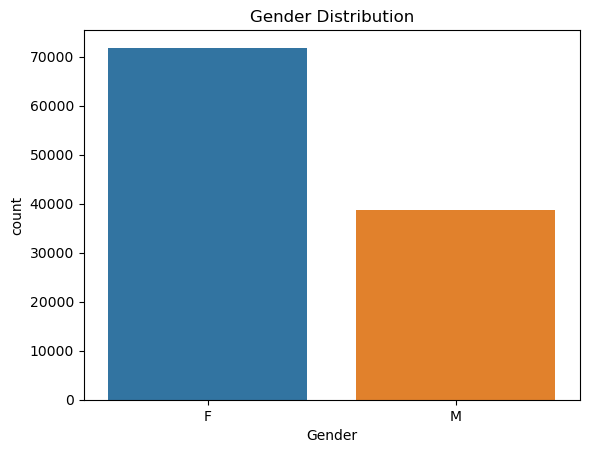

In [40]:
# viewing count plot of gender distribution in our dataset
sns.countplot(x = 'Gender', data = df)
plt.title("Gender Distribution")
plt.show()

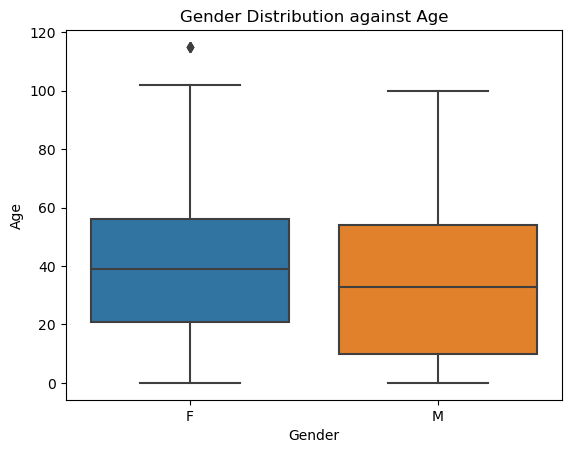

In [41]:
# viewing count plot of gender distribution against age in our dataset
sns.boxplot(x = 'Gender', y = 'Age', data = df)
plt.title("Gender Distribution against Age")
plt.show()

In [42]:
df['No-show'].value_counts()

True     88207
False    22314
Name: No-show, dtype: int64

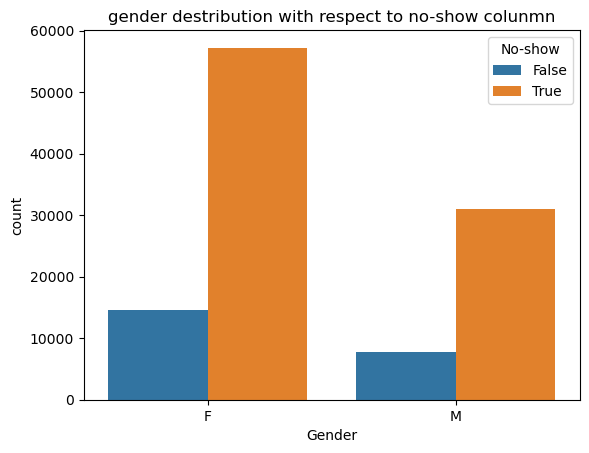

In [43]:
# showing the gender destribution with respect to the no-show colunmn
sns.countplot(x = 'Gender', data = df, hue = 'No-show')
plt.title('gender destribution with respect to no-show colunmn')
plt.show()

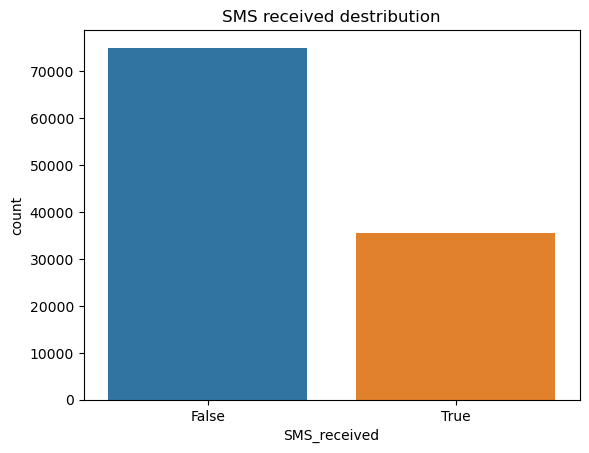

In [44]:
# viewing count plot of recieving SMS distribution in our dataset
sns.countplot(x = 'SMS_received', data = df)
plt.title("SMS received destribution")
plt.show()

In [45]:
df['SMS_received'].value_counts()

False    75039
True     35482
Name: SMS_received, dtype: int64

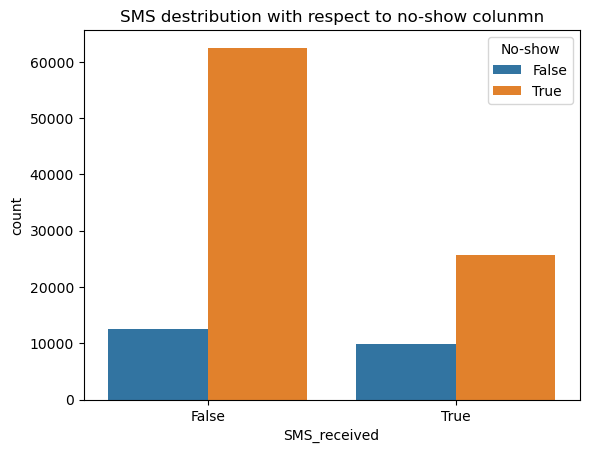

In [46]:
# showing the sms destribution with respect to the no-show colunmn
sns.countplot(x = 'SMS_received', data = df, hue = 'No-show')
plt.title('SMS destribution with respect to no-show colunmn')
plt.show()

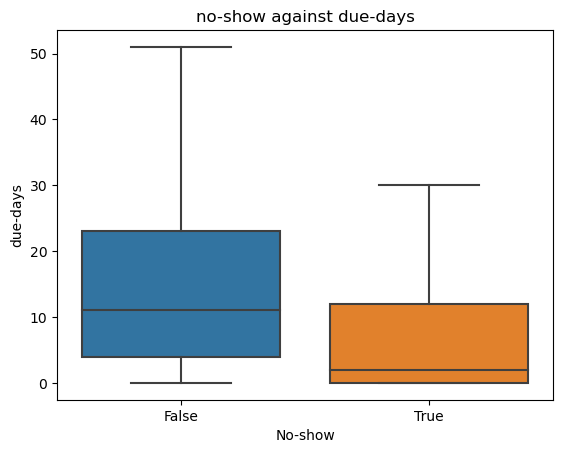

In [47]:
# viewing the correlation between no-show and due-days without outliers
sns.boxplot(x = 'No-show', y = 'due-days', data = df, showfliers = False)
plt.title('no-show against due-days')
plt.show()

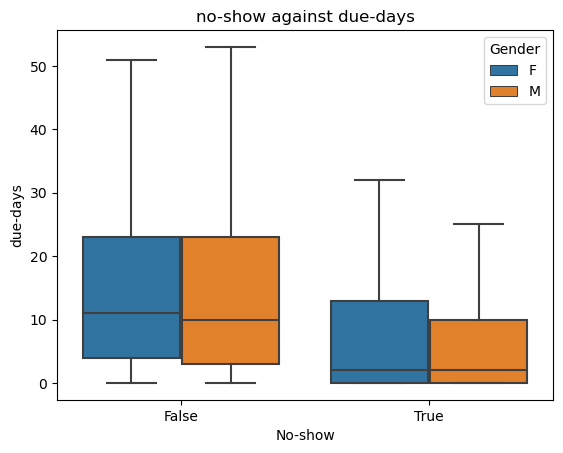

In [48]:
# viewing the correlation between no-show and due-days without outliers with respect to gender
sns.boxplot(x = 'No-show', y = 'due-days', data = df, hue = 'Gender', showfliers = False)
plt.title('no-show against due-days')
plt.show()

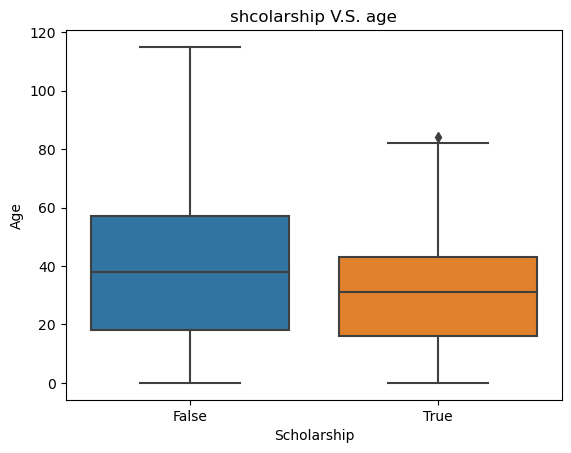

In [49]:
# plotting having a scholarship against age
sns.boxplot(x = 'Scholarship', y = 'Age', data = df)
plt.title('shcolarship V.S. age')
plt.show()

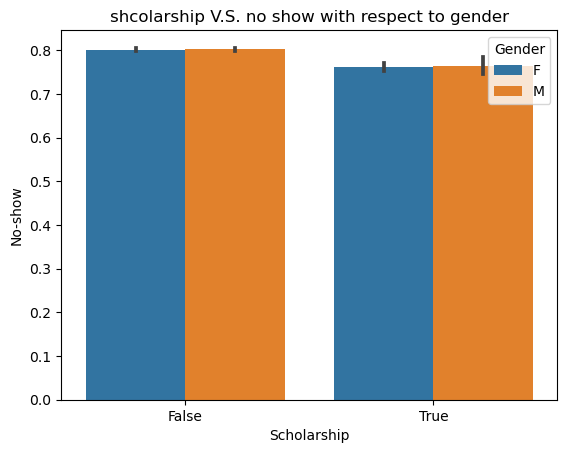

In [50]:
# plotting having a scholarship against no show with respect to gender
sns.barplot(x = 'Scholarship', y = 'No-show', hue = 'Gender', data = df)
plt.title('shcolarship V.S. no show with respect to gender')
plt.show()

<Axes: >

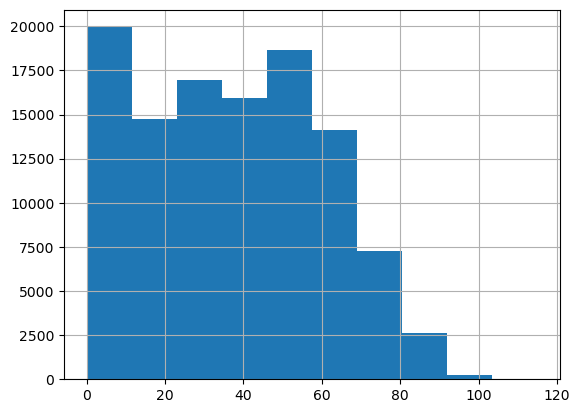

In [51]:
# ploting age destribution
df['Age'].hist()

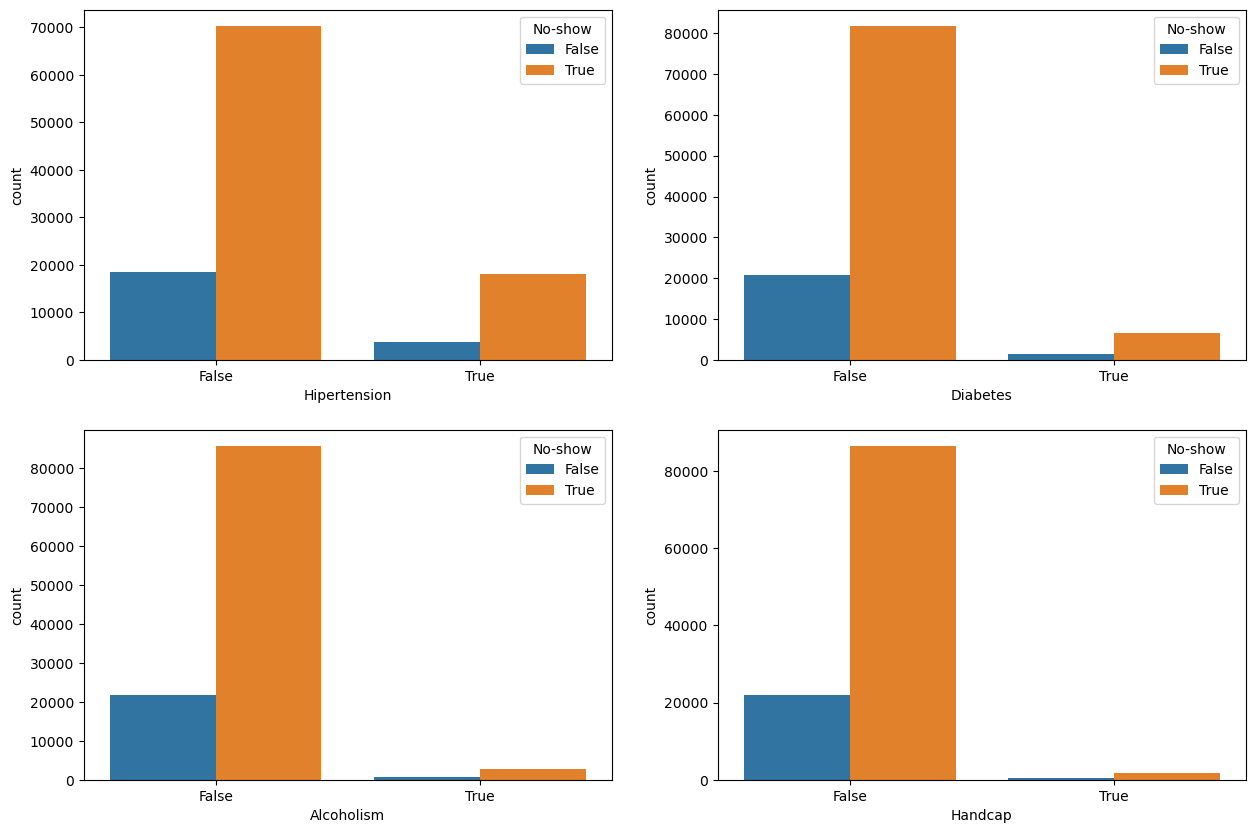

In [52]:
# plotting deseases against no show
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.countplot(x = 'Hipertension', data = df, hue= 'No-show')
plt.subplot(2,2,2)
sns.countplot(x = 'Diabetes', data = df, hue= 'No-show')
plt.subplot(2,2,3)
sns.countplot(x = 'Alcoholism', data = df, hue= 'No-show')
plt.subplot(2,2,4)
sns.countplot(x = 'Handcap', data = df, hue= 'No-show')
plt.show()

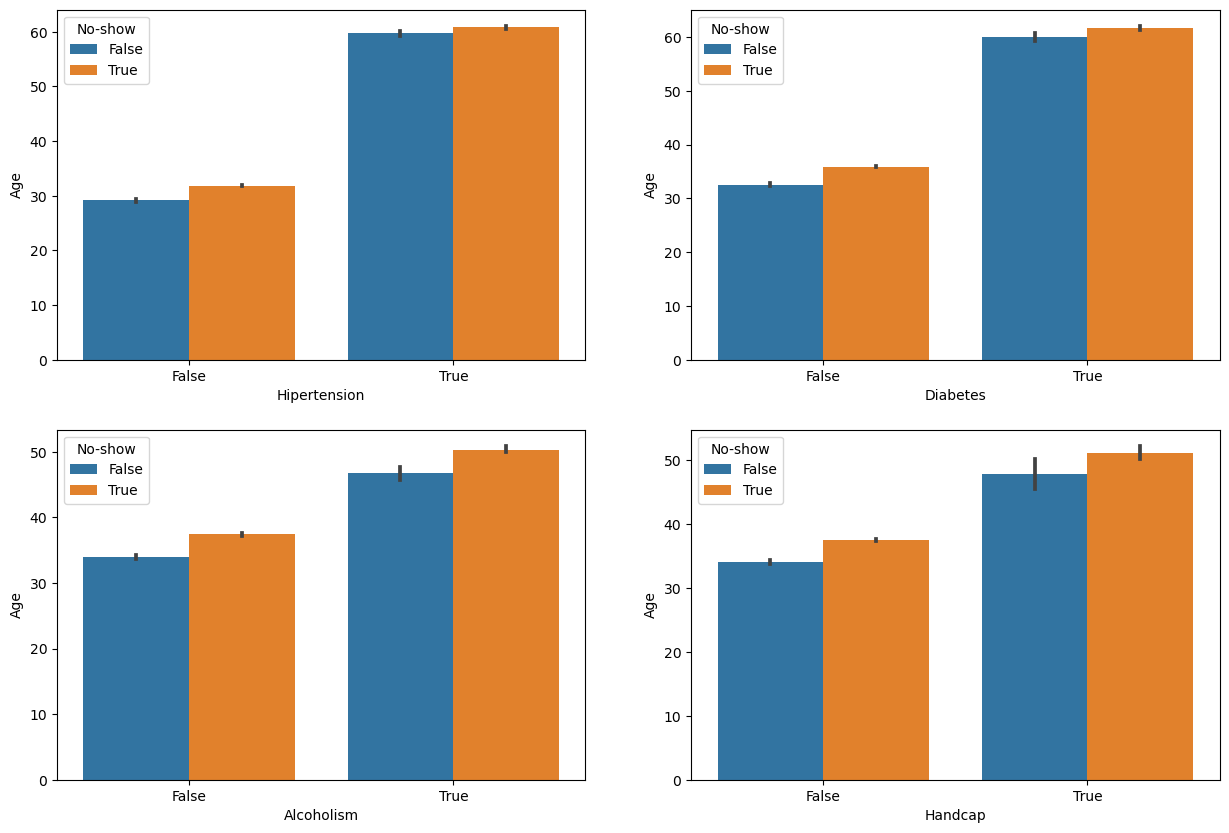

In [54]:
# plotting deseases against no show with respect to age
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.barplot(x = 'Hipertension', y = 'Age', data = df, hue= 'No-show')
plt.subplot(2,2,2)
sns.barplot(x = 'Diabetes', y = 'Age', data = df, hue= 'No-show')
plt.subplot(2,2,3)
sns.barplot(x = 'Alcoholism', y = 'Age', data = df, hue= 'No-show')
plt.subplot(2,2,4)
sns.barplot(x = 'Handcap', y = 'Age', data = df, hue= 'No-show')
plt.show()